In [8]:
class Value:
    def __init__(self, data, children=(), _op='', label=''):
        self.data = data
        self._prev = set(children)
        self._op = _op
        self.grad = 0.0

    def __repr__(self):
        return (f"Value(data={self.data})")

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    


In [7]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot



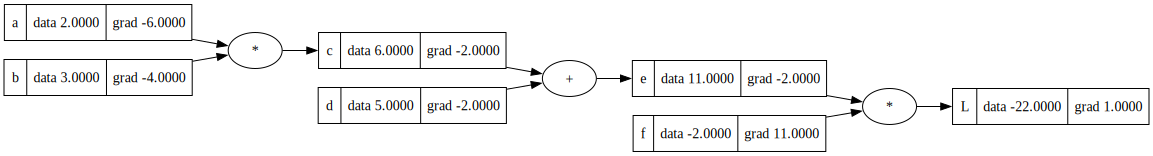

In [15]:

a = Value(2.0)
a.label = 'a'
b = Value(3.0)
b.label = "b"
c = a * b
c.label = 'c'
d = Value(5.0)
d.label = 'd'
e = c + d
e.label = 'e'
f = Value(-2.0)
f.label = "f"
L = e * f
L.label = 'L'
f.grad = 11.0
e.grad = -2
L.grad = 1.0
c.grad = -2
d.grad = -2
a.grad = 3.0 * -2.0
b.grad = 2.0 * -2.0
draw_dot(L)